Data Preparation

In [4]:
import pandas as pd
train_set=pd.read_csv('emnist-letters-train.csv').to_numpy()
test_set =pd.read_csv('emnist-letters-test.csv').to_numpy()

In [5]:
y = train_set[:, 0]
X = train_set[:, 1:]
X_valid,X_train = X[:17500] / 255, X[17500:] / 255
y_valid,y_train = y[:17500], y[17500:]

In [6]:
test_y = test_set[:, 0]
test_X = test_set[:, 1:]
X_test = test_X / 255
y_test = test_y

In [7]:
import numpy as np
X_train = np.reshape(X_train, (-1,28,28,1))
X_test = np.reshape(X_test, (-1,28,28,1))
X_train.shape, X_test.shape

((71299, 28, 28, 1), (14799, 28, 28, 1))

In [8]:
X_valid = np.reshape(X_valid, (-1,28,28,1))
X_valid.shape

(17500, 28, 28, 1)

In [9]:

y_valid.shape

(17500,)

In [10]:
y_train.shape

(71299,)

CNN Model Building


In [11]:
#Building the model
from tensorflow import keras
CnnModel = keras.models.Sequential([
    keras.layers.Conv2D(filters=64, kernel_size=7, activation='relu', padding="SAME",
                        input_shape=[28, 28, 1]),
    keras.layers.MaxPooling2D(pool_size=2),
    keras.layers.Conv2D(filters=128, kernel_size=3, activation='relu', padding="SAME"),
    keras.layers.Conv2D(filters=128, kernel_size=3, activation='relu', padding="SAME"),
    keras.layers.MaxPooling2D(pool_size=2),
    keras.layers.Conv2D(filters=256, kernel_size=3, activation='relu', padding="SAME"),
    keras.layers.Conv2D(filters=256, kernel_size=3, activation='relu', padding="SAME"),
    keras.layers.MaxPooling2D(pool_size=2),
    keras.layers.Flatten(),
    keras.layers.Dense(units=128, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(units=64, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(units=27, activation='softmax'),
])

In [12]:
#Callbacks
#stops the training if val_accuracy doesn't improve in 10 epochs
from keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_accuracy', patience=10, restore_best_weights=True)

In [13]:
#overview of the model
CnnModel.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 64)        3200      
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 64)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 128)       73856     
                                                                 
 conv2d_2 (Conv2D)           (None, 14, 14, 128)       147584    
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 7, 7, 128)         0         
 g2D)                                                            
                                                                 
 conv2d_3 (Conv2D)           (None, 7, 7, 256)         2

In [14]:
CnnModel.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(momentum=0.9),
              metrics=["accuracy"])

Train model

In [16]:
history = CnnModel.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid), callbacks=[early_stopping])

Epoch 1/30
2229/2229 [==============================] - 24s 8ms/step - loss: 1.4944 - accuracy: 0.5431 - val_loss: 0.3858 - val_accuracy: 0.8695
Epoch 2/30
2229/2229 [==============================] - 18s 8ms/step - loss: 0.5351 - accuracy: 0.8385 - val_loss: 0.2457 - val_accuracy: 0.9239
Epoch 3/30
2229/2229 [==============================] - 18s 8ms/step - loss: 0.4069 - accuracy: 0.8807 - val_loss: 0.2359 - val_accuracy: 0.9250
Epoch 4/30
2229/2229 [==============================] - 17s 8ms/step - loss: 0.3481 - accuracy: 0.8976 - val_loss: 0.2271 - val_accuracy: 0.9286
Epoch 5/30
2229/2229 [==============================] - 17s 7ms/step - loss: 0.3142 - accuracy: 0.9055 - val_loss: 0.2231 - val_accuracy: 0.9350
Epoch 6/30
2229/2229 [==============================] - 17s 7ms/step - loss: 0.2848 - accuracy: 0.9137 - val_loss: 0.2106 - val_accuracy: 0.9379
Epoch 7/30
2229/2229 [==============================] - 17s 8ms/step - loss: 0.2706 - accuracy: 0.9178 - val_loss: 0.2107 - val_ac

Evaluate the model

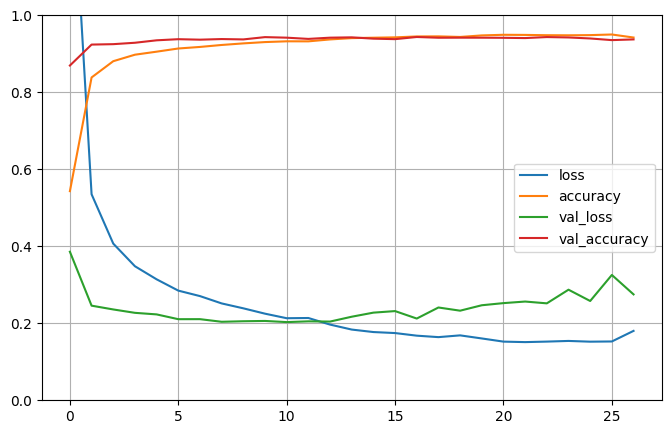

In [17]:
%matplotlib inline
import matplotlib.pyplot as plt

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [18]:
#Evaluate model on test data (separate csv file!)
CnnModel.evaluate(X_test, y_test)

463/463 [==============================] - 2s 4ms/step - loss: 0.2330 - accuracy: 0.9342


[0.2330447882413864, 0.934184730052948]

463/463 [==============================] - 1s 2ms/step


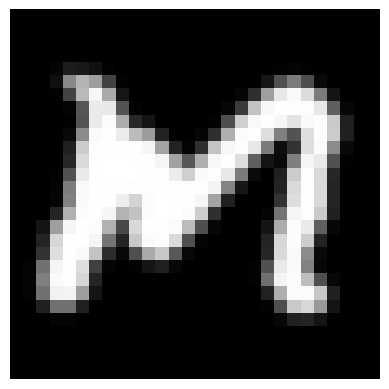

Correct Prediction!
Predicted Letter: m
Actual Letter: m


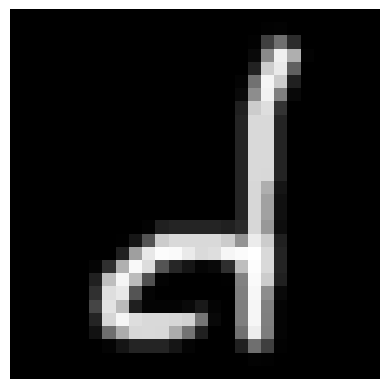

Correct Prediction!
Predicted Letter: d
Actual Letter: d


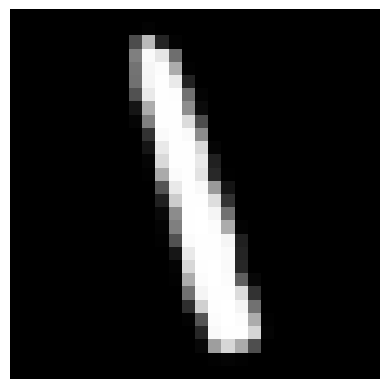

Incorrect Prediction.
Predicted Letter: l
Actual Letter: i


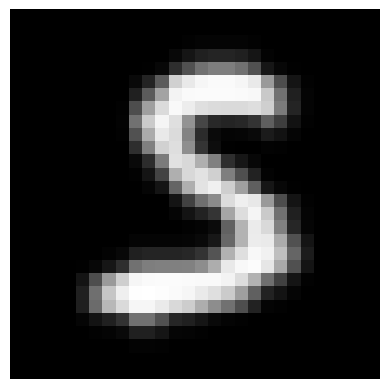

Correct Prediction!
Predicted Letter: s
Actual Letter: s


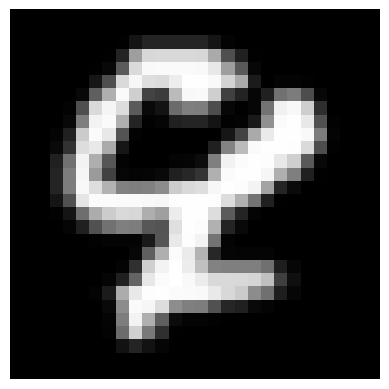

Correct Prediction!
Predicted Letter: q
Actual Letter: q


In [30]:
#Here we display the grayscale images using MatPlotLib to analyze which letters are problematic for our model, and get some visual clues
predictions = np.argmax(CnnModel.predict(X_test), axis=1)

#number of random letters to show
sample_size = 5
for i in range(sample_size):
  #we choose a random index in the test data
  index = np.random.randint(len(X_test))

  #Image is upside down, so we rotate 90 degrees

  rotated_image = np.rot90(X_test[index].reshape(28, 28), k=-1)

  #Image is mirrored, so we flip it vertically
  mirrored_image = np.fliplr(rotated_image)

  #show plot
  plt.imshow(mirrored_image, cmap='gray')
  plt.axis('off')
  plt.show()

  #initiate predictions
  predicted_class = predictions[index]
  actual_class = y_test[index]

  #Convert the ascii-index to letters in the alphabet (which is offset by 96 for lowercase letters)
  predicted_letter = chr(predicted_class + 96) if predicted_class != 0 else 'not a letter'
  actual_letter = chr(actual_class + 96) if actual_class != 0 else 'Not a letter'


  #Check if the model's prediction matches the actual classification by the model
  if predicted_class == actual_class:
    print("Correct Prediction!")
  else:
    print("Incorrect Prediction.")

  print("Predicted Letter:", predicted_letter)
  print("Actual Letter:", actual_letter)